# Tutorial "Ciencia de datos: Aprendiendo lo básico"

## Workshop CIO Update 2016
## Autor: Roberto Muñoz

En este tutorial haremos una revisión de los procesos de exploración, análisis y visualización de datos los cuales son comúnes en el campo del Data Science.

Este tutorial fue construido usando el lenguaje Python 3 y la aplicación web Jupyter.

Usaremos los siguientes datasets,
- Terremotos ocurridos durante la última década en el mundo y publicados por el USGS
- Uso del transporte 

Los principales paquetes y librerías de Python que se usan en el campo del Data Science son los siguientes,

#### NumPy

Website: [http://www.numpy.org](http://www.numpy.org)

NumPy is probably the most fundamental package for efficient scientific computing in Python through linear algebra routines. One of NumPy's major strength is that most operations are implemented as C/C++ and FORTRAN code for efficiency. At its core, NumPy works with multi-dimensional array objects that support broadcasting and lead to efficient, vectorized code.

#### SciPy

Website: [http://scipy.org/scipylib/index.html](http://scipy.org/scipylib/index.html)

SciPy is a considered to be one of the core packages for scientific computing routines. As a useful expansion of the NumPy core functionality, it contains a broad range of functions for linear algebra, interpolation, integration, clustering, and [many more](http://docs.scipy.org/doc/scipy/reference/index.html).


#### Pandas

Website: [http://pandas.pydata.org](http://pandas.pydata.org)

Pandas is a library for operating with table-like structures. It comes with a powerful DataFrame object, which is a multi-dimensional array object for efficient numerical operations similar to NumPy's *ndarray* with additional functionalities.

#### Scikit-learn

Website: [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)

Scikit-learn is is probably the most popular general machine library for Python. It includes a broad range of different classifiers, cross-validation and other model selection methods, dimensionality reduction techniques, modules for regression and clustering analysis, and a useful data-preprocessing module.

#### Matplotlib

Website: [http://matplotlib.org](http://matplotlib.org)

Matplotlib is Python's most popular and comprehensive plotting library that is especially useful in combination with NumPy/SciPy.

#### Bokeh

Website: [http://bokeh.pydata.org](http://bokeh.pydata.org)

Bokeh is a plottling library that is focussed on aesthetic layouts and interactivity to produce high-quality plots for web browsers.

---
#### 1. Partimos importando Numpy, Pandas y Matplotlib

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt

%matplotlib inline

params = {'backend': 'agg',
'axes.labelsize': 16,
'font.size': 16,
'legend.fontsize': 14,
'xtick.labelsize': 14,
'ytick.labelsize': 14,
'text.usetex': False,
'figure.figsize': [10,6]}
pylab.rcParams.update(params)
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

Visitamos la página web del United States Geological Service (USGS)

Hacemos una busqueda en el link http://earthquake.usgs.gov/earthquakes/search/

![title](data/USGS%20earthquake%20webpage.jpg)

![title](data/USGS%20earthquake%20search.jpg)


---
#### Leemos el archivos CSV que descargamos desde el sitio web de la USGS. Usamos la libreria Pandas para leer y cargar en memoria los datos.

In [2]:
data_file='data/USGS earthquake 2006-2016.csv'
earthquake=pd.read_csv(data_file,header=0,sep=',')
earthquake['time']=pd.to_datetime(earthquake['time'], errors='coerce')

#### Los datos fueron cargados en una variable llamada earthquake. El primer paso en la exploración de los datos es desplegar el encabezado.

In [3]:
earthquake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2006-01-01 03:21:39.210,13.951,146.358,36.7,4.6,mb,24.0,101.1,NaN,0.99,...,2014-11-07T01:28:00.144Z,Mariana Islands region,earthquake,NaN,23.3,NaN,2.0,reviewed,us,us
1,2006-01-01 07:11:57.010,31.394,140.131,10.0,5.6,mwb,143.0,98.9,NaN,1.35,...,2015-05-13T18:53:50.000Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
2,2006-01-01 08:47:13.350,4.735,95.144,51.5,5.5,mwb,276.0,25.9,NaN,0.73,...,2015-06-30T16:59:03.179Z,"northern Sumatra, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,2006-01-01 09:43:14.810,11.839,-71.193,69.0,5.1,mwc,189.0,36.3,NaN,0.87,...,2015-02-11T17:18:12.000Z,Golfo de Venezuela,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
4,2006-01-01 10:26:30.200,-19.133,-173.500,44.2,4.9,mb,21.0,129.0,NaN,1.24,...,2014-11-07T01:28:01.091Z,Tonga,earthquake,NaN,56.4,NaN,6.0,reviewed,us,us


#### También podemos mostrar las columnas que contiene la tabla y el número de elementos

In [4]:
print("Columnas de earthquake: ", earthquake.columns.values, "\n")
print("Numero de elementos: ", len(earthquake.index), "\n")

Columnas de earthquake:  ['time' 'latitude' 'longitude' 'depth' 'mag' 'magType' 'nst' 'gap' 'dmin'
 'rms' 'net' 'id' 'updated' 'place' 'type' 'horizontalError' 'depthError'
 'magError' 'magNst' 'status' 'locationSource' 'magSource'] 

Numero de elementos:  76855 



#### Las visualizaciones y gráficos nos pueden ayudar enormemente en la exploración de los datos. Un tipo de gráfico muy útil corresponde al histograma. A Continuación usamos un histograma para mostrar la distribución del número de terremotos como función de la magnitud.

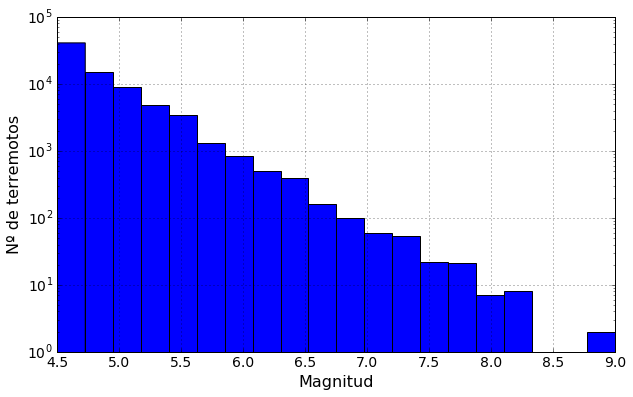

In [5]:
#fig, ax = plt.subplots(figsize=(10,6))
ax=earthquake['mag'].hist(bins=20)
ax.set_yscale('log')
ax.set_xlabel('Magnitud')
ax.set_ylabel('Nº de terremotos')

#### Del histograma podemos ver que la distribución del número de terremotos sigue una ley de potencia y que el número disminuye a medida que aumenta la intensidad del terremoto.

#### Digamos que nos llama la atención el último bin del gráfico y queremos imprimir en pantalla cuáles fueron esos terremotos. Usamos la función query de pandas e imprimos los terremotos con magnitud mayor a 8.5.

In [6]:
earthquake.query('mag>8.5')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
27645,2010-02-27 06:34:11.530,-36.122,-72.898,22.9,8.8,mwc,454.0,17.8,NaN,1.09,...,2016-05-03T15:30:47.329Z,"offshore Bio-Bio, Chile",earthquake,NaN,9.2,NaN,NaN,reviewed,us,us
35261,2011-03-11 05:46:24.120,38.297,142.373,29.0,9.0,mww,541.0,9.5,NaN,1.16,...,2016-02-11T22:47:50.084Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
45681,2012-04-11 08:38:36.720,2.327,93.063,20.0,8.6,mww,499.0,16.6,NaN,1.33,...,2016-03-02T18:30:13.189Z,off the west coast of northern Sumatra,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


#### Supongamos que queremos mostrar la evolución temporal de los terremotos. Para ello, usaremos la columna 'time' de la tabla y haremos un histograma para mostrar el número de terremotos como función de la fecha.

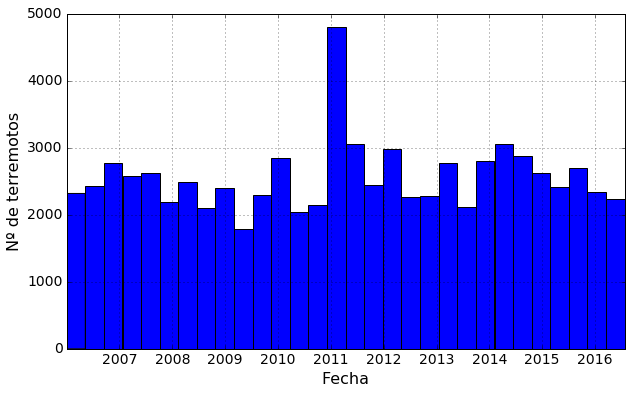

In [7]:
ax=earthquake['time'].hist(bins=30)
ax.set_xlabel('Fecha')
ax.set_ylabel('Nº de terremotos')

#### Algunas veces queremos ir al detalle y mostrar el número de terremotos por cada año y mes. La tabla original solo tiene la columna 'time' para la fecha y hora del evento. Para facilitar el análisis, crearemos una columna para el año (year) y otra para el mes (month) basadas en la columna de la fecha (time).

In [8]:
earthquake['year']=earthquake['time'].dt.year
earthquake['month']=earthquake['time'].dt.month

#### Luego simplemente usamos la función groupby de Pandas para agrupar los terremotos por año y mes. En este caso, estamos interesados en contar el numero de terremotos y por ellos usaremos la función count.

In [9]:
earthquake_count=earthquake.groupby(by=['year','month'])['mag'].count()
print(earthquake_count)

year  month
2006  1         442
      2         440
      3         619
      4         598
      5         691
      6         511
      7         734
      8         532
      9         434
      10        556
      11        997
      12        515
2007  1         703
      2         484
      3         554
      4         856
      5         463
      6         472
      7         538
      8         688
      9         784
      10        588
      11        572
      12        562
2008  1         446
      2         499
      3         528
      4         555
      5         709
      6         571
               ... 
2014  2         553
      3         664
      4        1028
      5         682
      6         774
      7         668
      8         632
      9         580
      10        743
      11        743
      12        606
2015  1         553
      2         519
      3         520
      4         524
      5         710
      6         515
      7         601
      8 

#### Ahora procedemos a graficar la distribución del número de tererremotos por año y mes. Usamos la variable earthquake_count que contiene las cuentas de terremotos por año y mes.

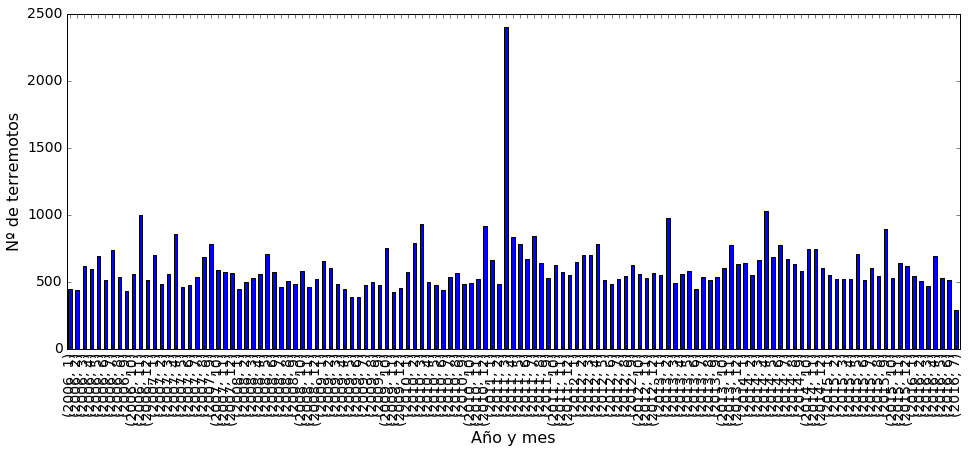

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax=earthquake_count.plot(kind="bar")
ax.set_xlabel('Año y mes')
ax.set_ylabel('Nº de terremotos')

#### Nuestra primear observación de este gráfico es que es muy difícil de leer. La razóm se debe a que estamos tratando de graficar mucha información usando un gráfico de barras y por ello la información del eje X aparece tan apretada.

#### Una solución sería graficar un conjunto de datos más pequeños, digamos solamente los terremotos del año 2011. La otra solución es hacer un gráfico de barras donde acumulemos los terremotos por mes. Para ello usaremos las funciones unstrack de Pandas.

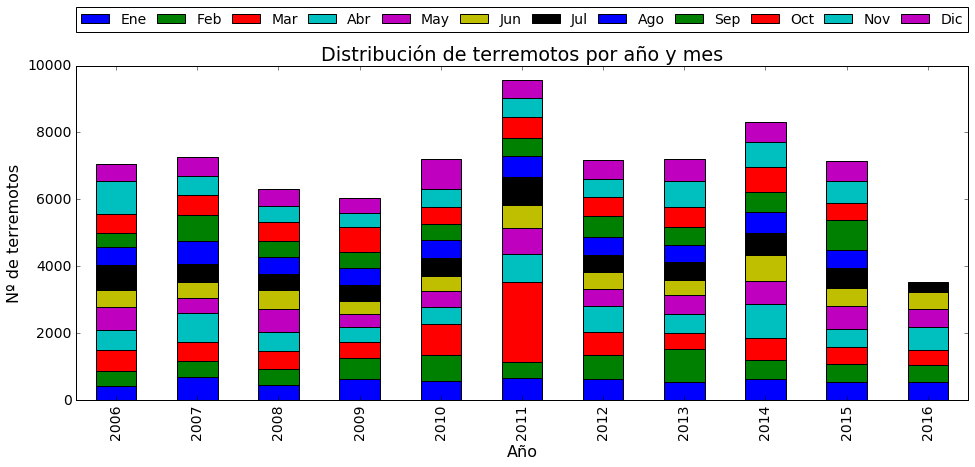

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
earthquake_count.unstack().plot(ax=ax, kind='bar',stacked=True,title="Distribución de terremotos por año y mes")
ax.set_xlabel("Año")
ax.set_ylabel("Nº de terremotos")
ax.legend(["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"], bbox_to_anchor=(0., 1.1, 1., .102), loc=3, ncol=12, mode="expand", borderaxespad=0.)

#### Este último gráfico de barras acumulado es útil para visualizar la información. Por ejemplo, podemos notar que el 2011 corresponde al año con más terremotos y que para el año 2016 solo tenemos datos hasta julio.

#### Para el año 2011 podemos notar que el mes de marzo concentra la mayoría de los terremotos. Usaremos la función query para buscar terremotos del año 2011 y luego groupby para agrupar por año y mes.

In [12]:
earthquake.query('year==2011').groupby([earthquake['year'],earthquake['month']])['mag'].count()

year  month
2011  1         660
      2         482
      3        2401
      4         833
      5         782
      6         668
      7         840
      8         638
      9         527
      10        624
      11        570
      12        551
Name: mag, dtype: int64

#### Algo que quizás nos pueda interesar es saber en qué lugar ocurrieron los terremotos de marzo del 2011. Para ello podriamos usar la columna place de la tabla

In [29]:
earthquake_query=earthquake.query('year==2011 & month==3').groupby(by=['place'])['mag'].count().sort_values(ascending=False)
print(earthquake_query)
print("\nNumero de registros: ", len(earthquake_query.index))

place
off the east coast of Honshu, Japan                      1131
near the east coast of Honshu, Japan                      781
eastern Honshu, Japan                                      30
Vanuatu                                                    21
off the east coast of the Kamchatka Peninsula, Russia      18
Gulf of California                                         15
Tonga                                                      15
Fiji region                                                14
South Sandwich Islands region                              14
Bonin Islands, Japan region                                13
New Britain region, Papua New Guinea                       10
south of the Fiji Islands                                  10
Mindanao, Philippines                                       9
offshore Valparaiso, Chile                                  8
northern Mid-Atlantic Ridge                                 7
Mid-Indian Ridge                                            7
Ku

#### Podemos notar que más del 50% de los terremotos del mes de marzo del 2011 ocurrieron en Japón

In [25]:
from nltk.tag import StanfordNERTagger
import operator
import re

stanford = StanfordNERTagger("english.muc.7class.distsim.crf.ser.gz")

In [30]:
for i, text in enumerate(earthquake_query.index.values):
    print("Registro: ",i, " - Place: ", text)
    text_split=stanford.tag(text.split())
    print(text_split)

Registro:  0  - Place:  off the east coast of Honshu, Japan
[('off', 'O'), ('the', 'O'), ('east', 'O'), ('coast', 'O'), ('of', 'O'), ('Honshu,', 'O'), ('Japan', 'LOCATION')]
Registro:  1  - Place:  near the east coast of Honshu, Japan
[('near', 'O'), ('the', 'O'), ('east', 'O'), ('coast', 'O'), ('of', 'O'), ('Honshu,', 'O'), ('Japan', 'LOCATION')]
Registro:  2  - Place:  eastern Honshu, Japan
[('eastern', 'O'), ('Honshu,', 'O'), ('Japan', 'LOCATION')]
Registro:  3  - Place:  Vanuatu
[('Vanuatu', 'LOCATION')]
Registro:  4  - Place:  off the east coast of the Kamchatka Peninsula, Russia
[('off', 'O'), ('the', 'O'), ('east', 'O'), ('coast', 'O'), ('of', 'O'), ('the', 'O'), ('Kamchatka', 'LOCATION'), ('Peninsula,', 'LOCATION'), ('Russia', 'LOCATION')]
Registro:  5  - Place:  Gulf of California
[('Gulf', 'O'), ('of', 'O'), ('California', 'LOCATION')]
Registro:  6  - Place:  Tonga
[('Tonga', 'LOCATION')]
Registro:  7  - Place:  Fiji region
[('Fiji', 'LOCATION'), ('region', 'O')]
Registro:  8

# WORK IN PROGRESS

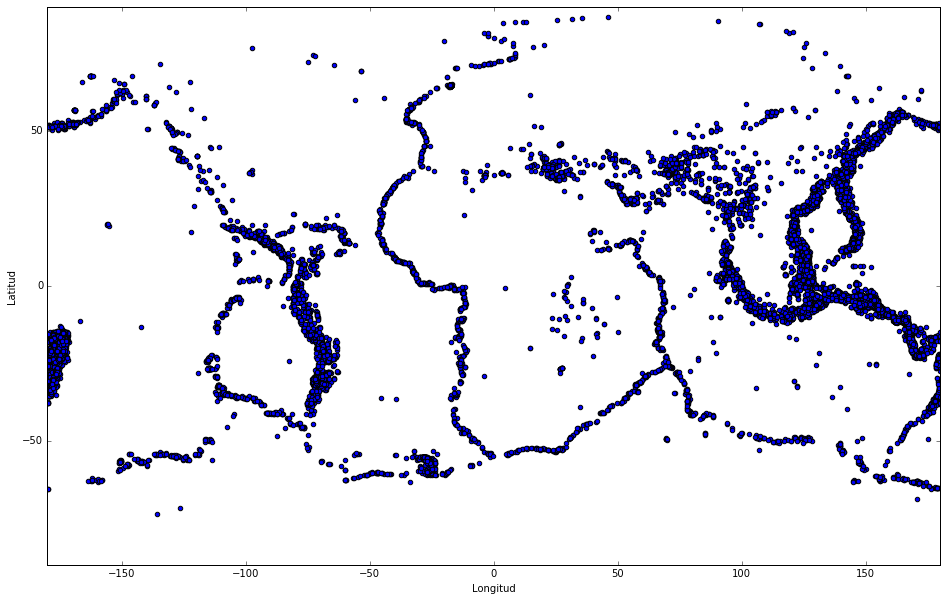

In [143]:
fig, ax = plt.subplots(figsize=(16,10))
earthquake.plot(ax=ax, kind='scatter', x='longitude',y='latitude', xlim=[-180,180], ylim=[-90,90])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

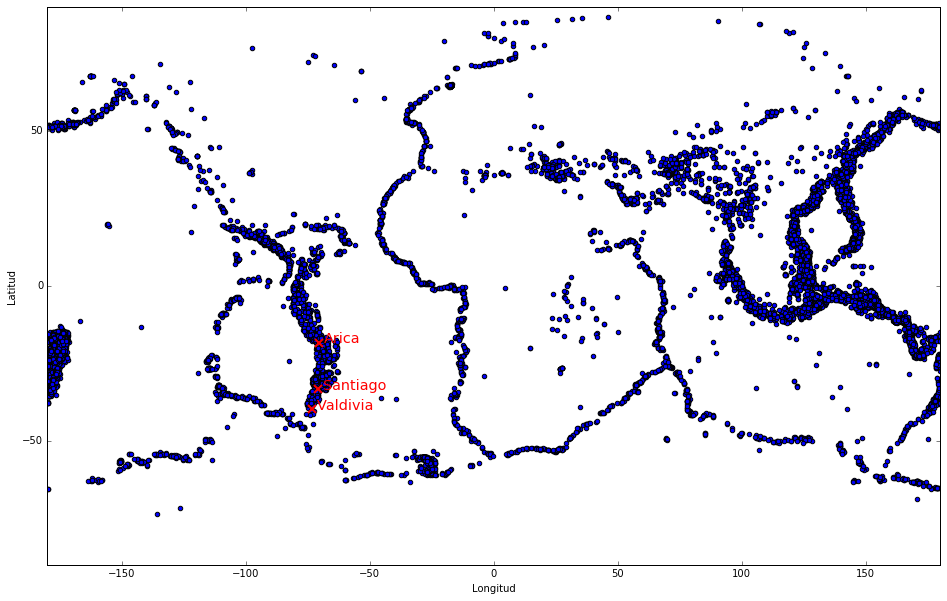

In [144]:
data={'name':['Arica','Santiago','Valdivia'],
      'latitude':[-18.4783,-33.4489,-39.8196],
      'longitude':[-70.3126,-70.6693,-73.2452]}
city = pd.DataFrame(data, columns=['name', 'latitude', 'longitude'])
for i in range(len(city.index)):
    ax.plot(city['longitude'][i], city['latitude'][i], marker='x', color='red', ms=8, mew=2)
    ax.text(city['longitude'][i]+2, city['latitude'][i], city['name'][i], horizontalalignment='left', color='red', size='x-large')
fig

(-90, 90)

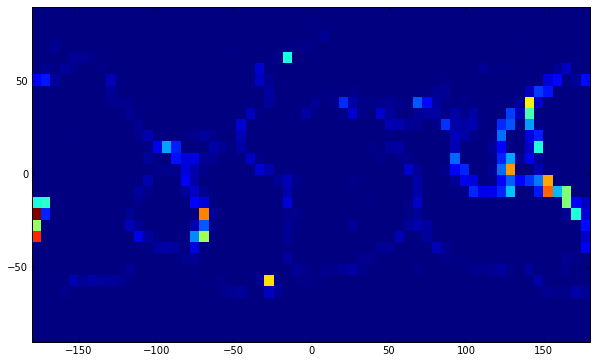

In [68]:
x=np.asarray(data['longitude'])
y=np.asarray(data['latitude'])
xbins=60
ybins=30
xrange=[-180,180]
yrange=[-90,90]

fig = plt.figure(figsize=(10,6))
hist2D, xedges, yedges = np.histogram2d(x, y, bins=[xbins,ybins], range=[xrange,yrange],normed=False)
hist2D = np.transpose(hist2D)
plt.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.jet)
plt.xlim(xrange)
plt.ylim(yrange)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

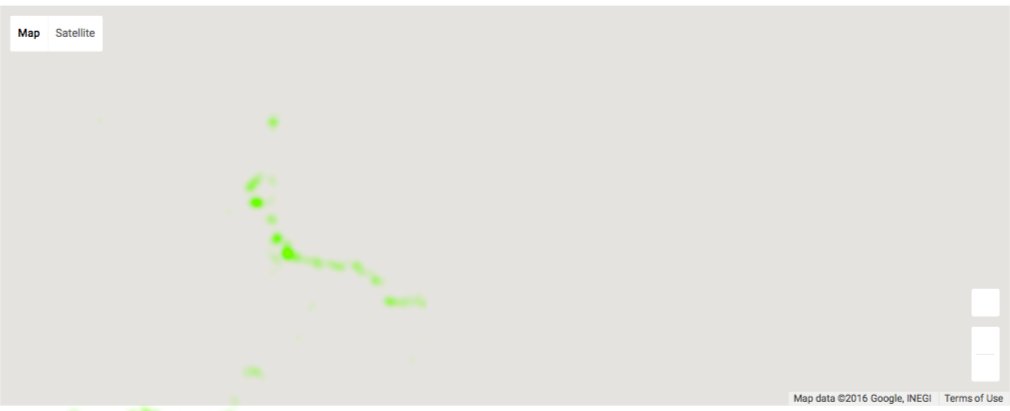

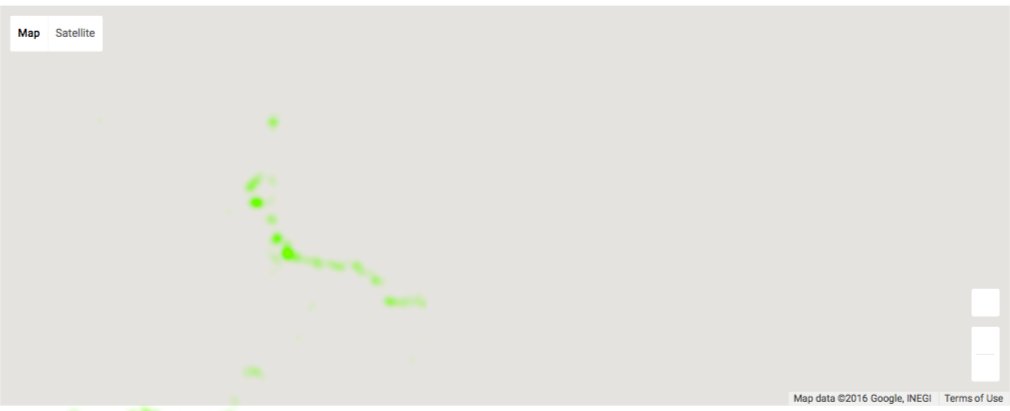

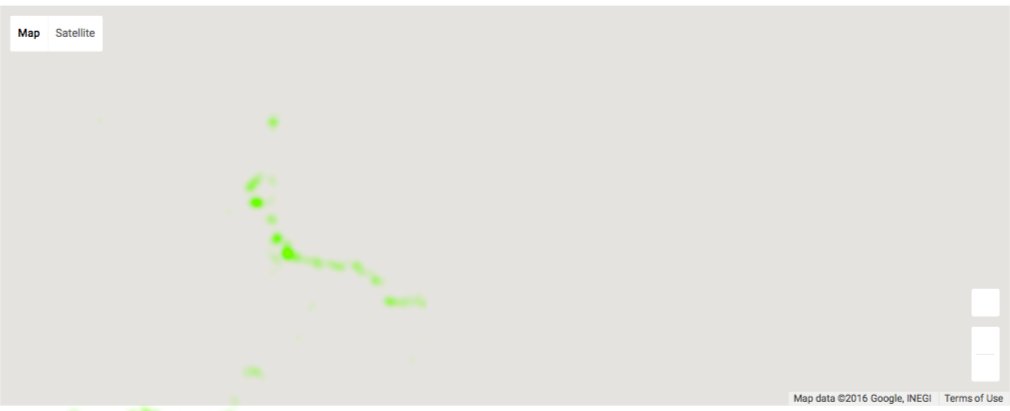

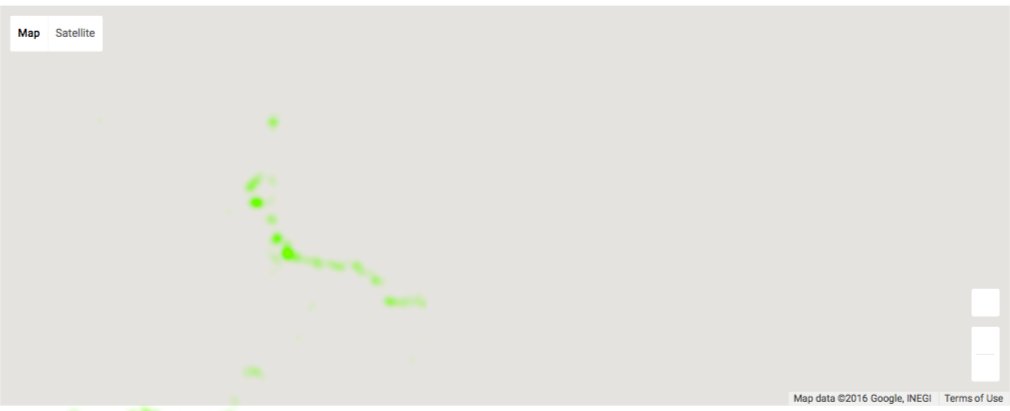

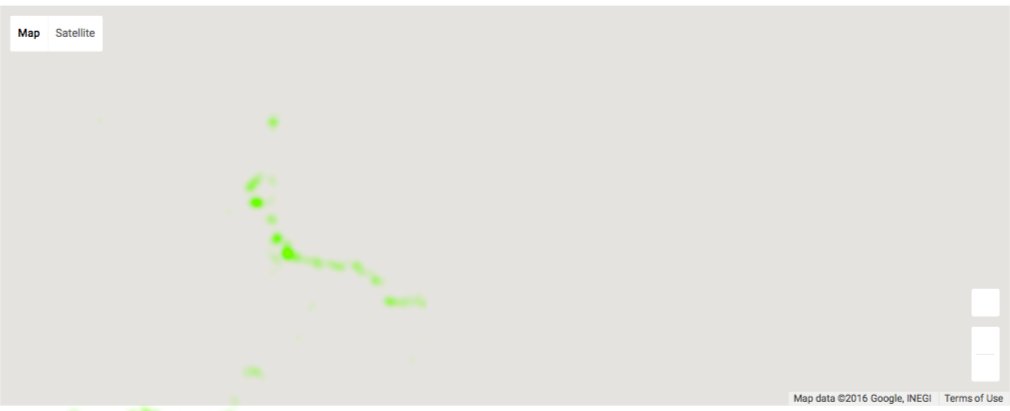

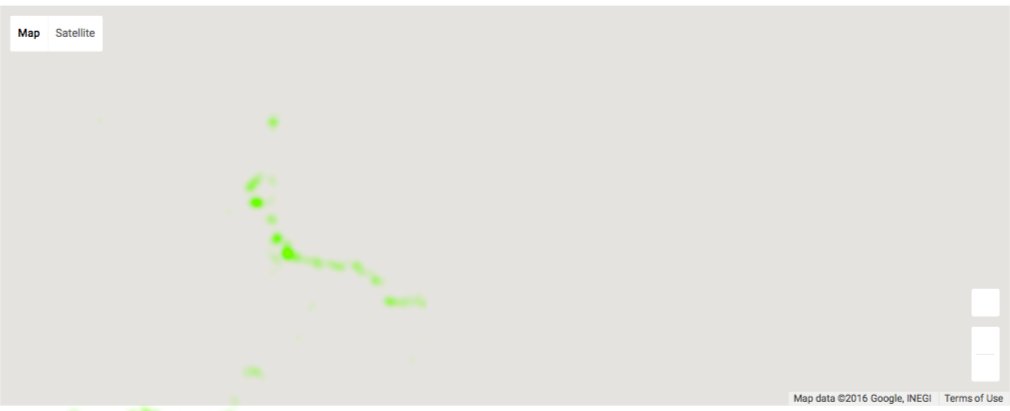

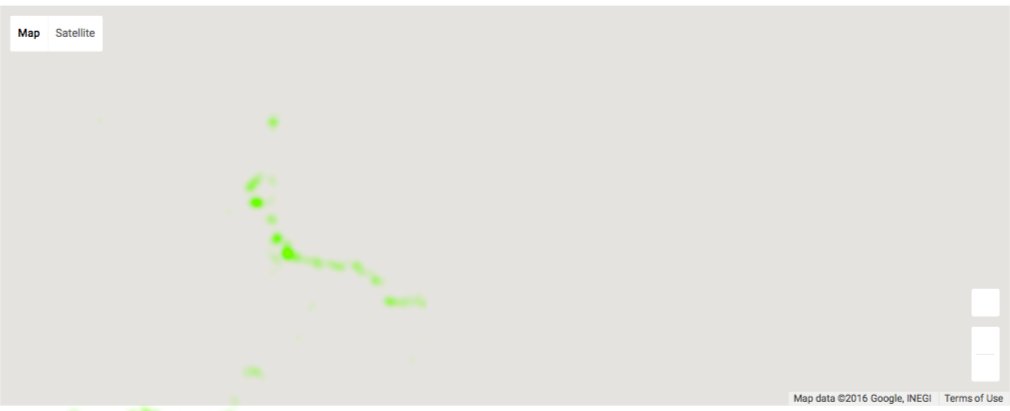

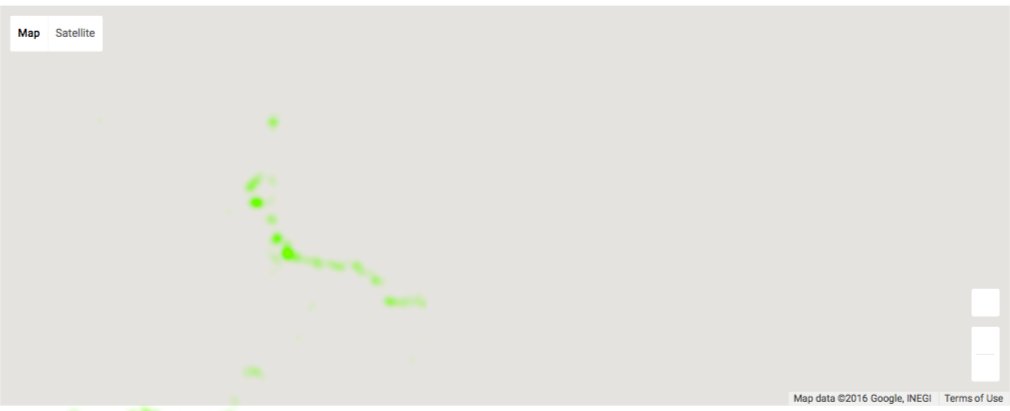

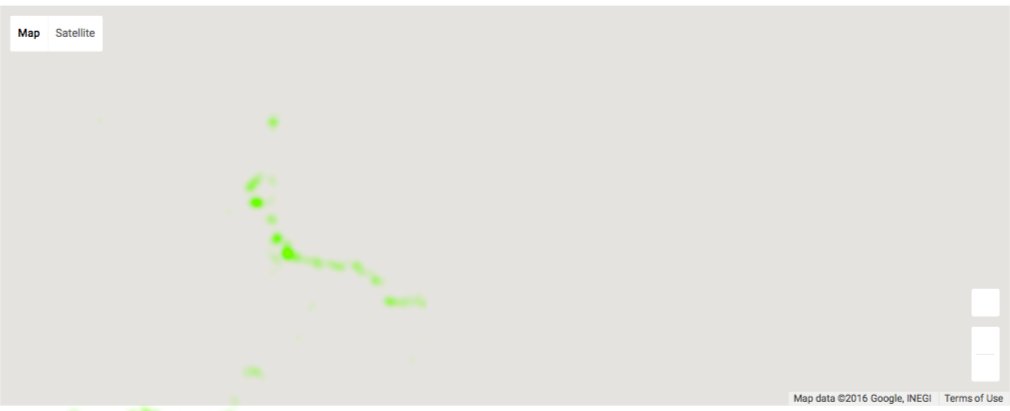

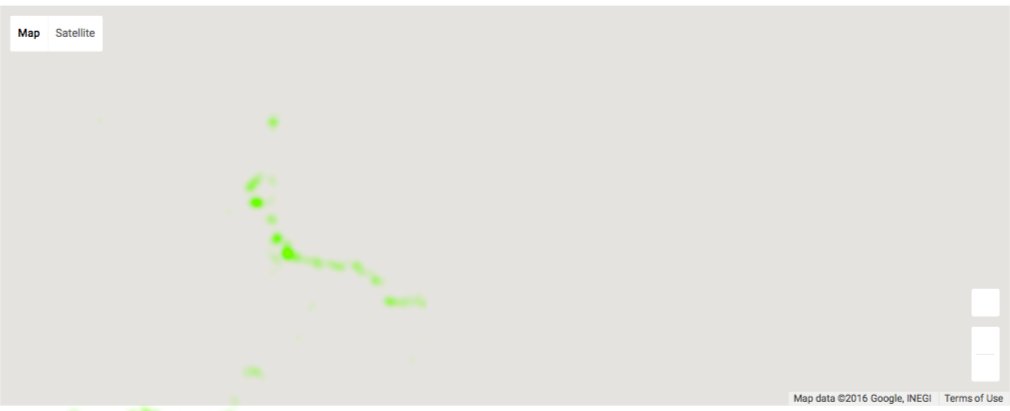

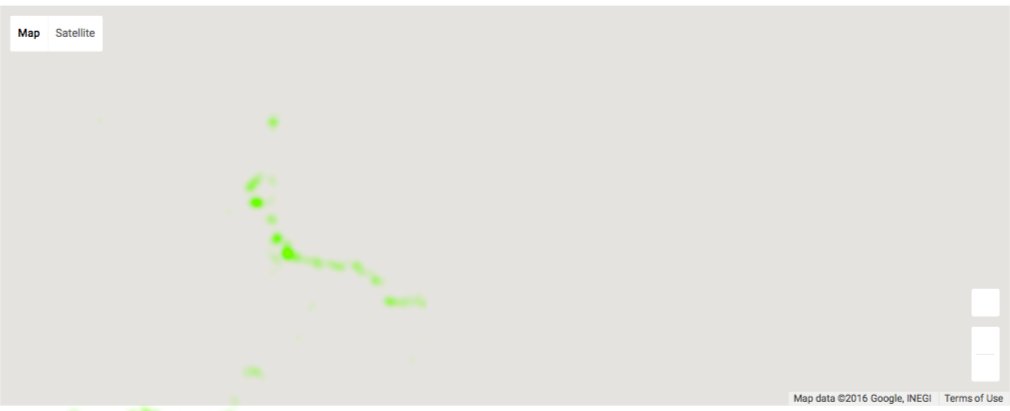

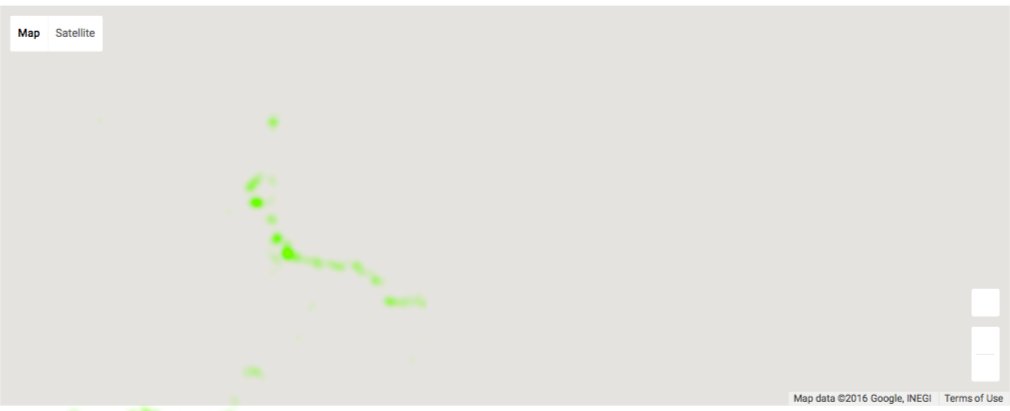

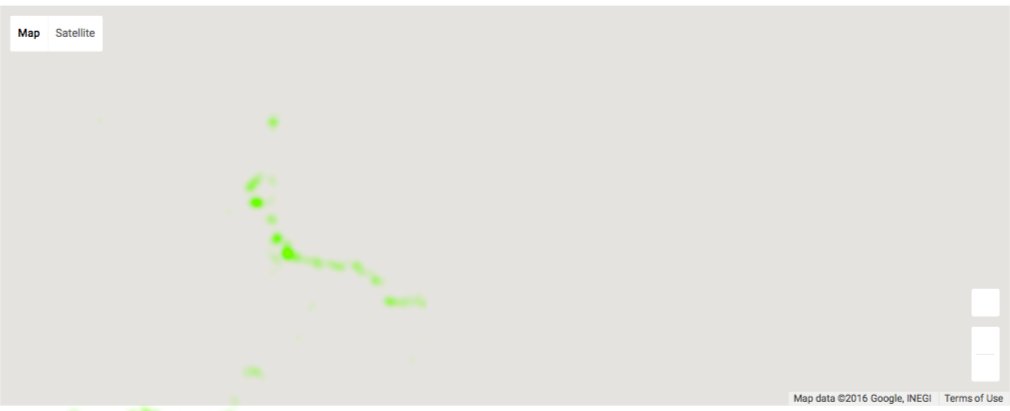

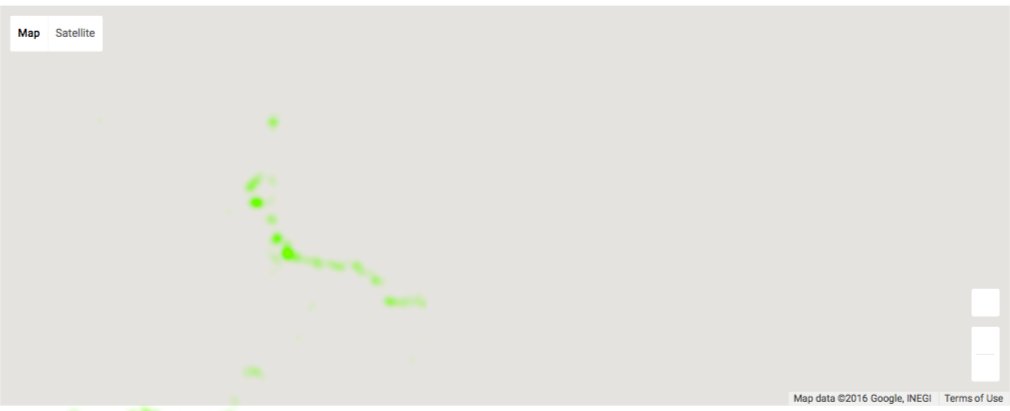

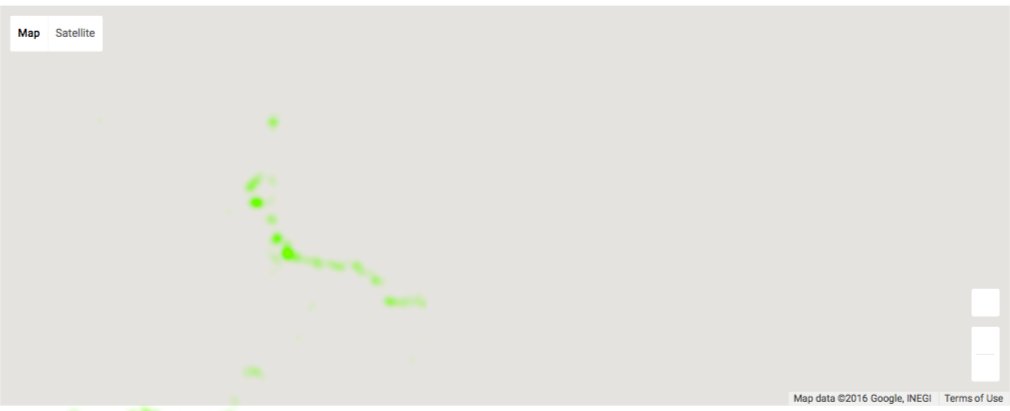

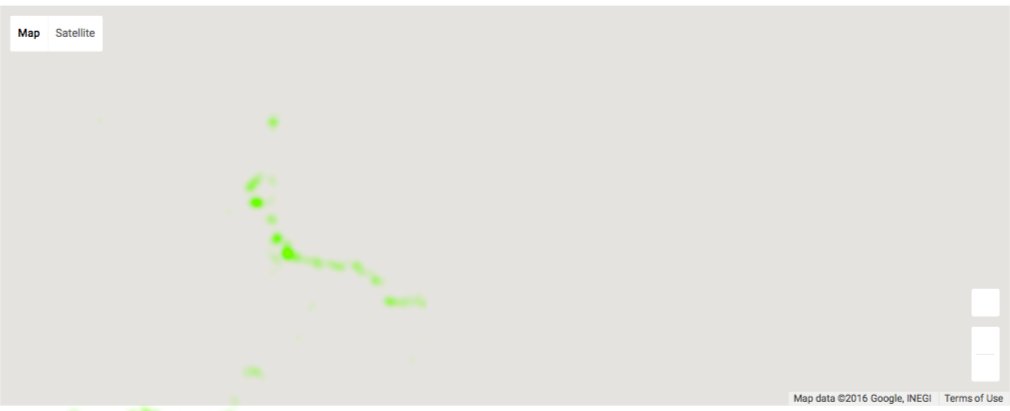

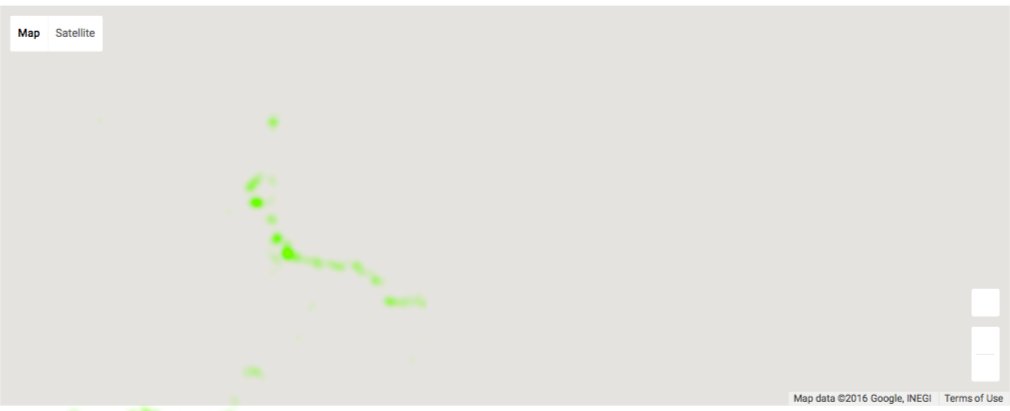

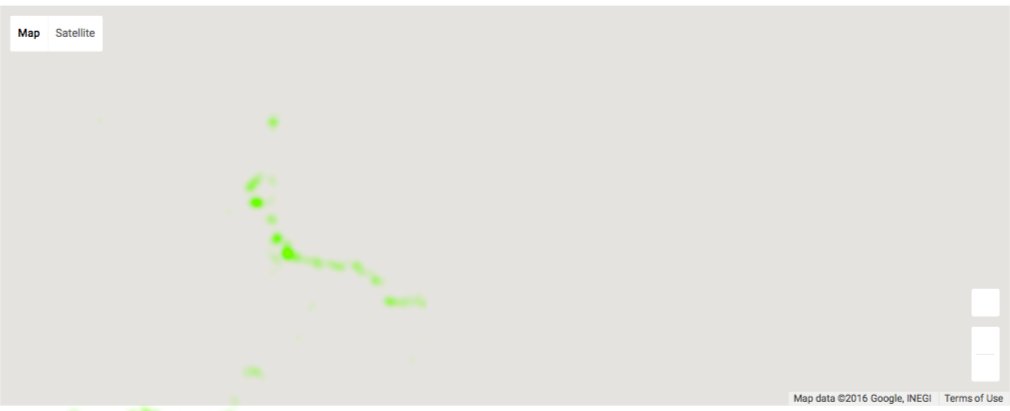

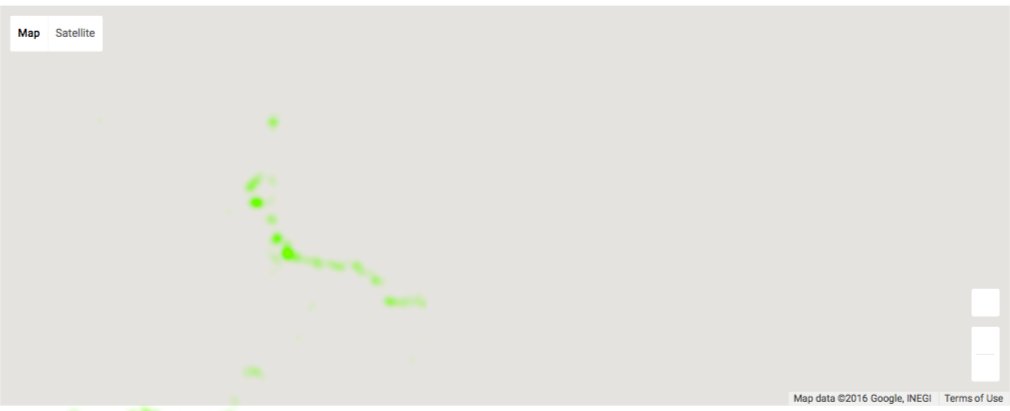

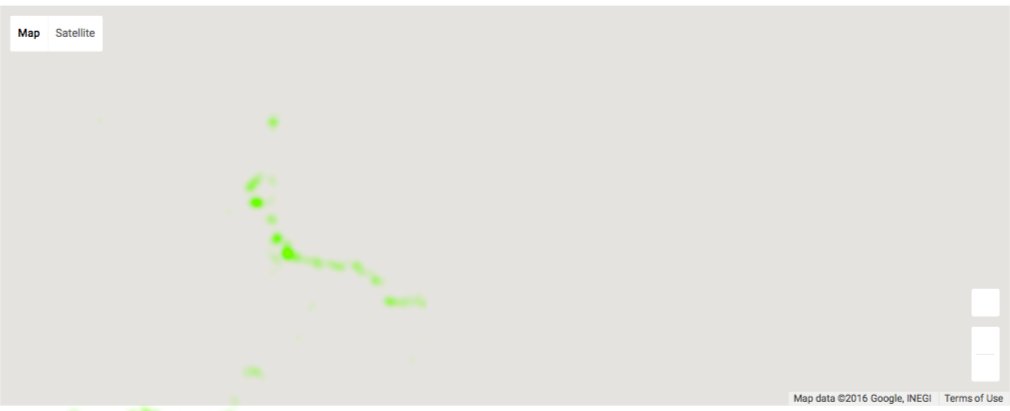

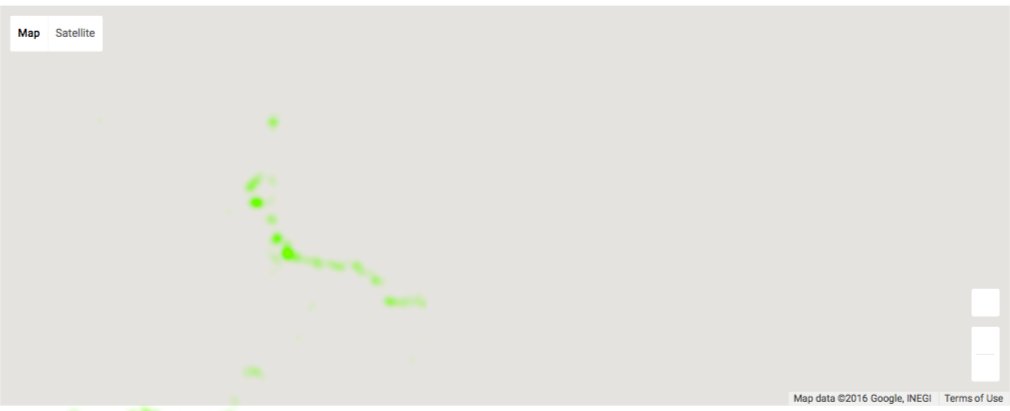

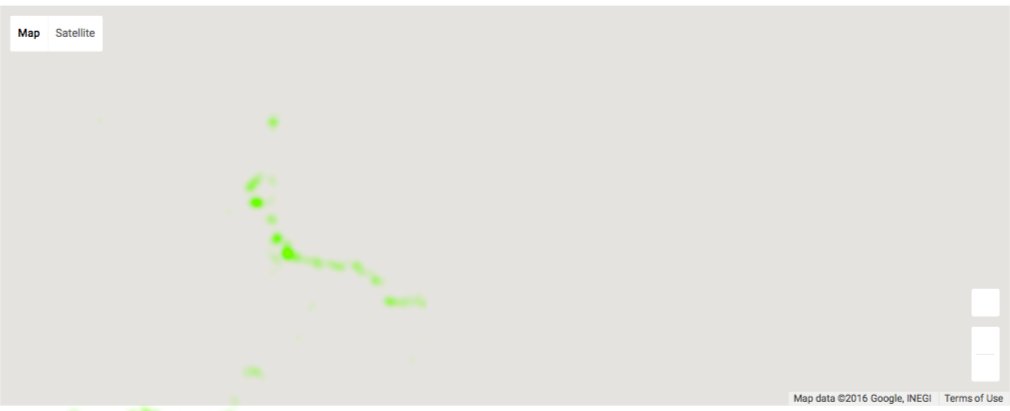

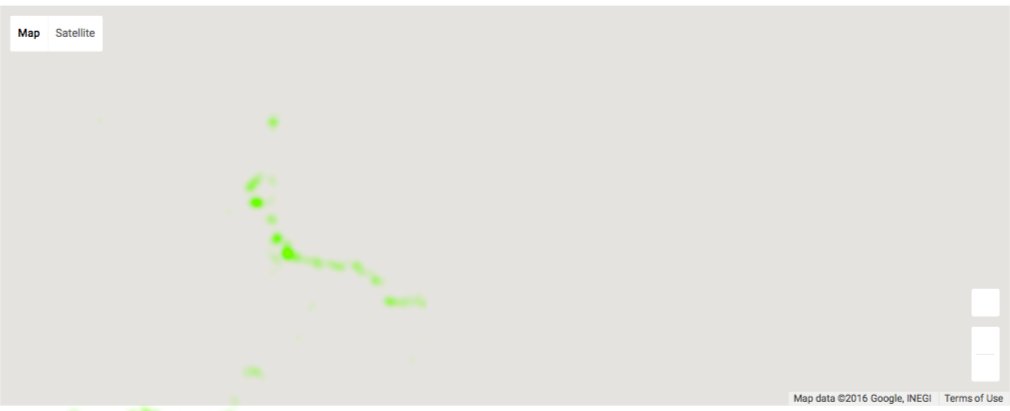

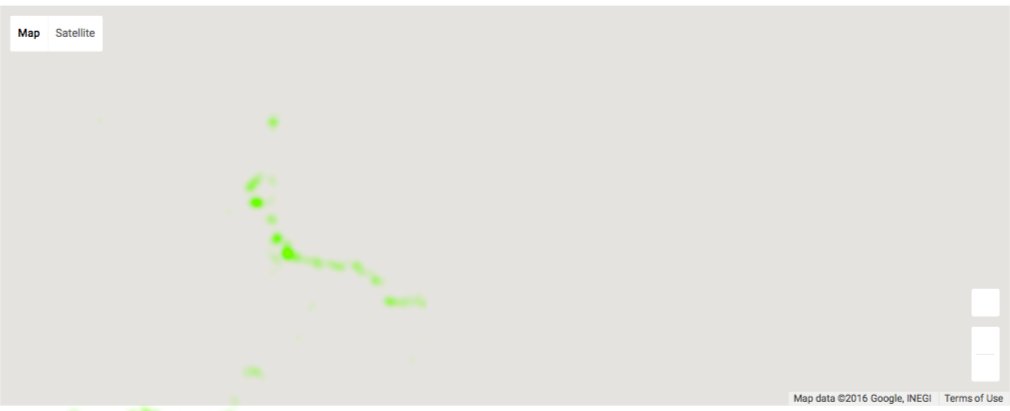

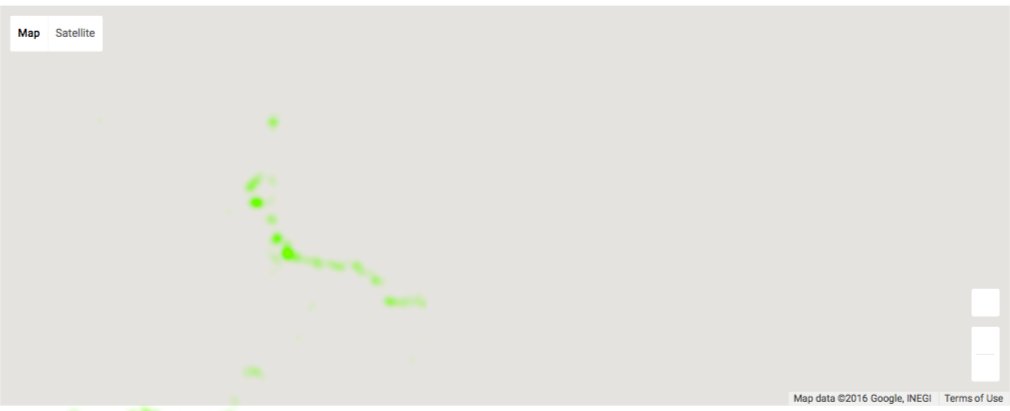

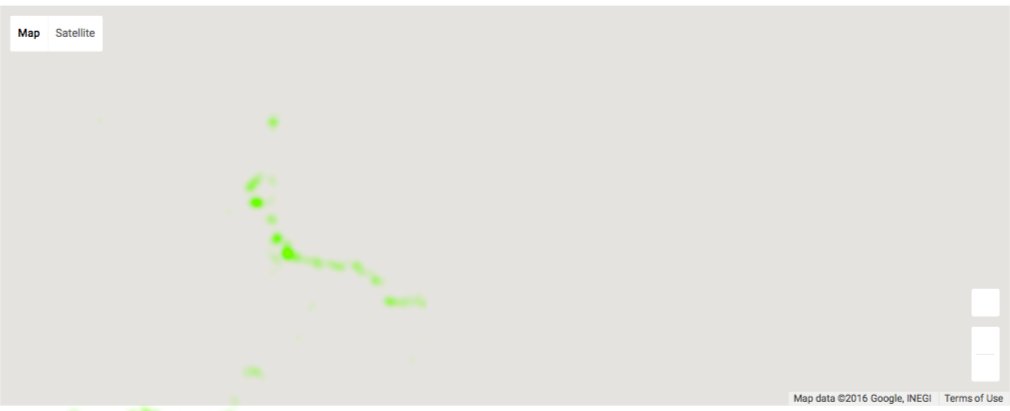

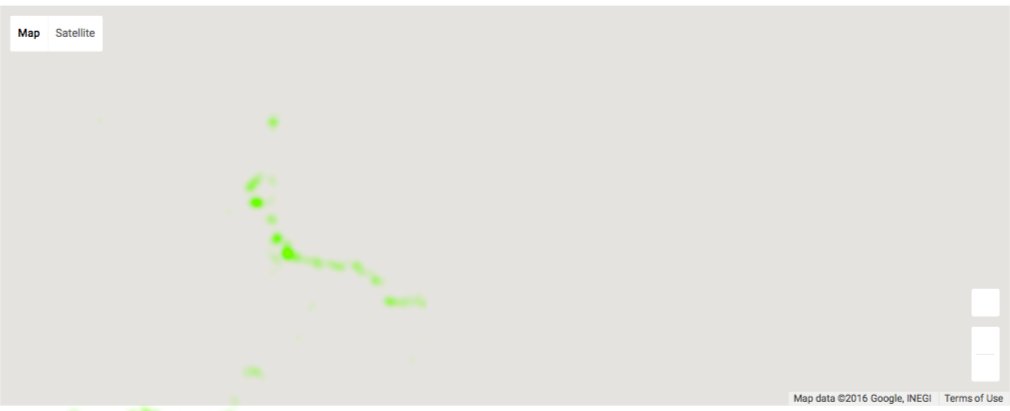

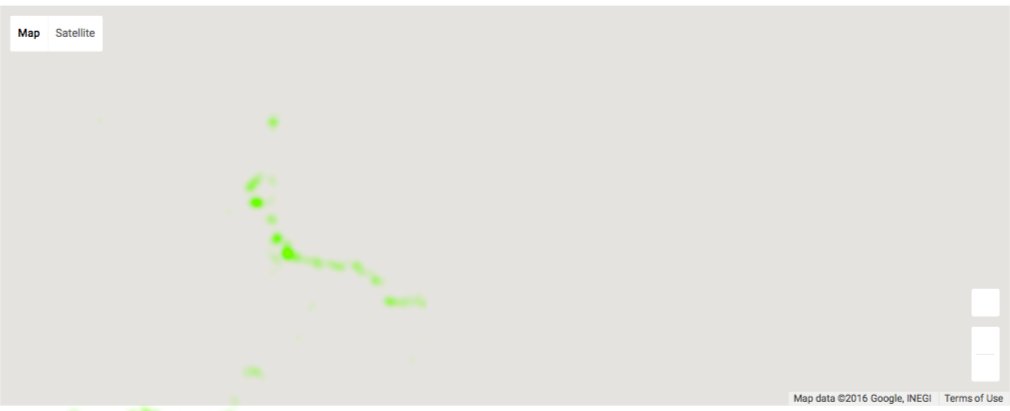

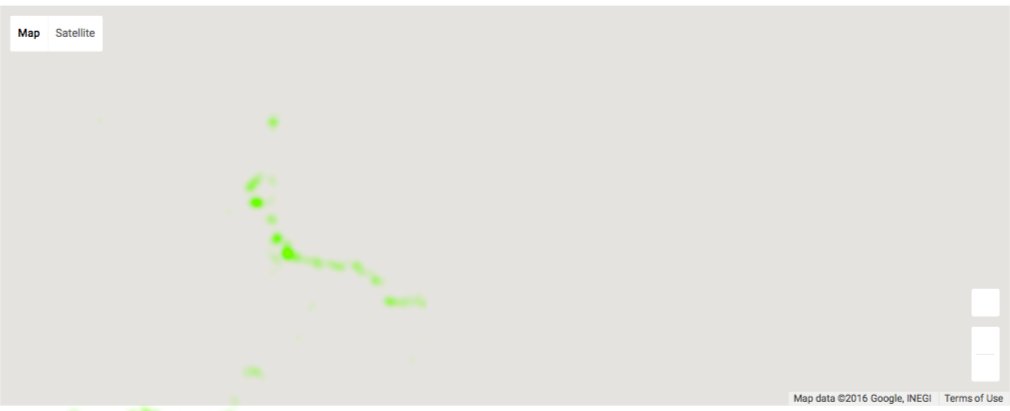

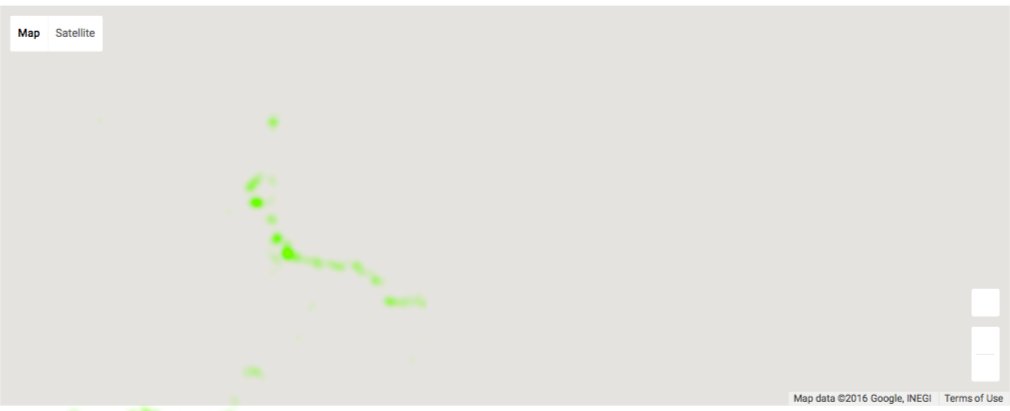

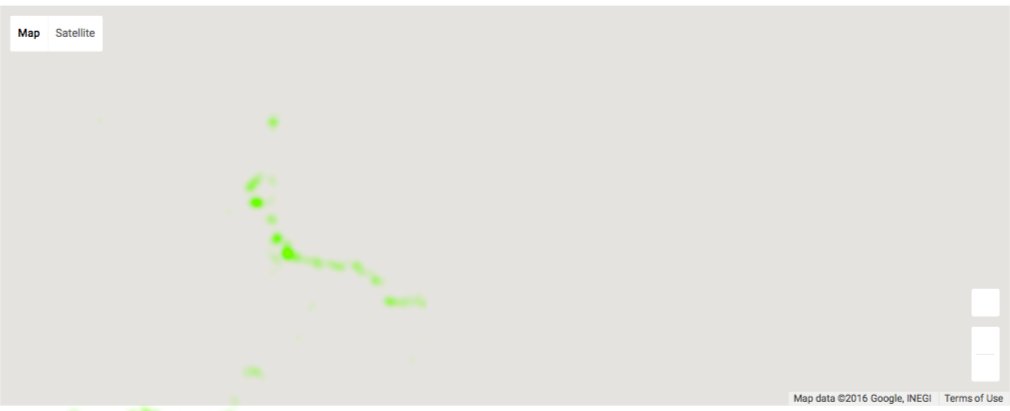

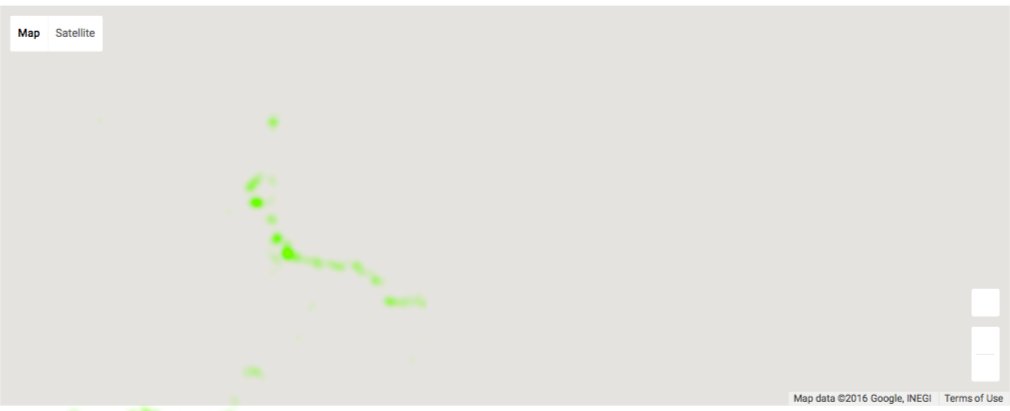

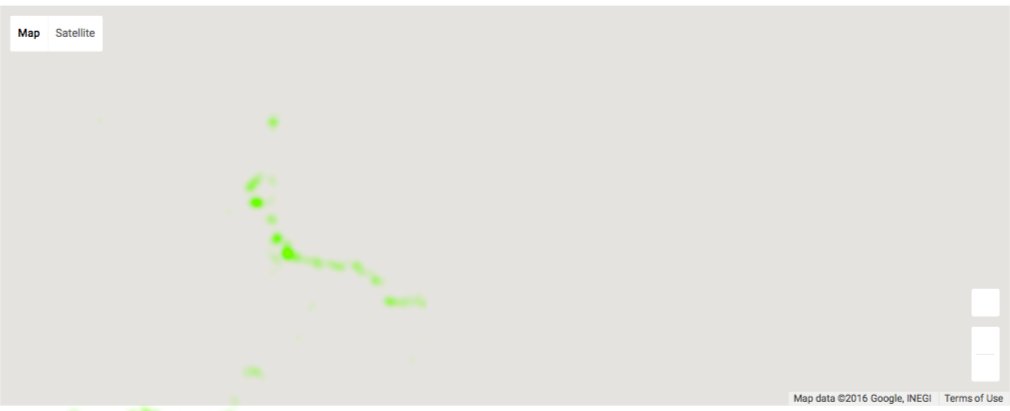

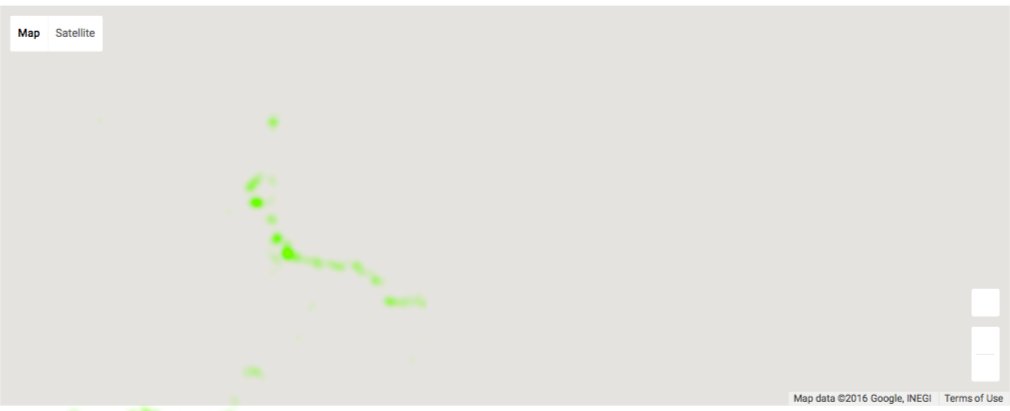

In [53]:
import gmaps
import gmaps.datasets

#Follow the instructions in the following link to obtain a Google API key http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html
gmaps.configure(api_key="")

m = gmaps.Map()

data_gmaps=np.asarray(data[['latitude','longitude','mag']]).tolist()
m.add_layer(gmaps.WeightedHeatmap(data=data_gmaps))
m

In [182]:
file1='USGS earthquake 2006-2008.csv'
file2='USGS earthquake 2008-2010.csv'
file3='USGS earthquake 2010-2012.csv'
file4='USGS earthquake 2012-2014.csv'
file5='USGS earthquake 2014-2016.csv'
data1=pd.read_csv(file1,header=0,sep=',')
data2=pd.read_csv(file2,header=0,sep=',')
data3=pd.read_csv(file3,header=0,sep=',')
data4=pd.read_csv(file4,header=0,sep=',')
data5=pd.read_csv(file5,header=0,sep=',')

data=pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
data['time']=pd.to_datetime(data['time'], errors='coerce')
data.to_csv('USGS earthquake 2006-2016.csv',index=False)

In [ ]:
import spacy
nlp = spacy.load('en')

for place in earthquake['place'].values:
    text=nlp(place)
    n=len(text.ents)
    if n
    for ent in text.ents:
        print(ent, ent.label, ent.label_)